In [ ]:
import tensorflow
import keras

MNIST contains load_data function which containes trained datasets

In [ ]:
(X_train,Y_train),(X_test , Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape #60k images with 28 X 28 pixels

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt

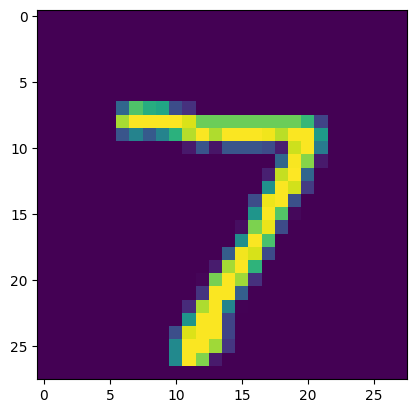

In [ ]:
#To check the structure
plt.imshow(X_test[0])

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
model = tensorflow.keras.Sequential()
#Flatten the array mean 28 X 28 converted to 784 means 2D image cnverted to 1D
model.add(tensorflow.keras.layers.Flatten(input_shape = (28,28)))
model.add(tensorflow.keras.layers.Dense(128 , activation = 'relu')) #hidden layer
model.add(tensorflow.keras.layers.Dense(64,activation = 'relu'))
model.add(tensorflow.keras.layers.Dense(32,activation = 'relu'))
model.add(tensorflow.keras.layers.Dense(10 , activation = 'softmax'))#output layer is softmax because 10 neurons

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer= 'Adam' , metrics=['accuracy'])

In [ ]:
#Here validation split is 0.2 means 20% rows alag karlenge
history  = model.fit(X_train,Y_train,epochs=20 ,validation_split=0.2 )

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2840 - accuracy: 0.9147 - val_loss: 0.1504 - val_accuracy: 0.9533
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1160 - accuracy: 0.9641 - val_loss: 0.1273 - val_accuracy: 0.9592
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0826 - accuracy: 0.9739 - val_loss: 0.0966 - val_accuracy: 0.9722
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0636 - accuracy: 0.9802 - val_loss: 0.1079 - val_accuracy: 0.9703
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0510 - accuracy: 0.9835 - val_loss: 0.0950 - val_accuracy: 0.9727
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.1018 - val_accuracy: 0.9750
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.1023 - val_accuracy:

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_pred = y_prob.argmax(axis = 1)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import r2_score,accuracy_score

In [ ]:
r2_score(y_pred , Y_test)

0.9488939008441927

In [ ]:
accuracy_score(y_pred , Y_test)

0.977

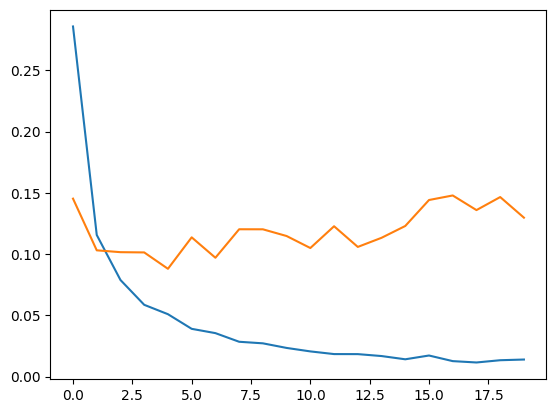

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

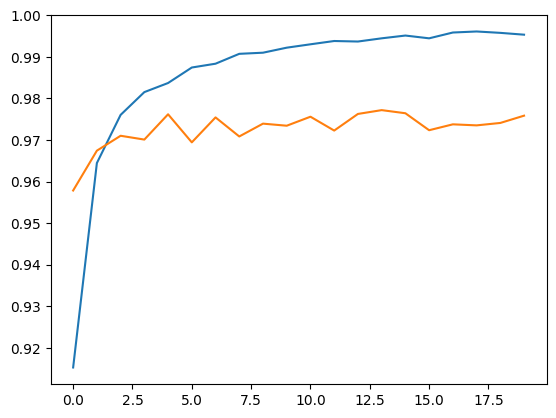

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

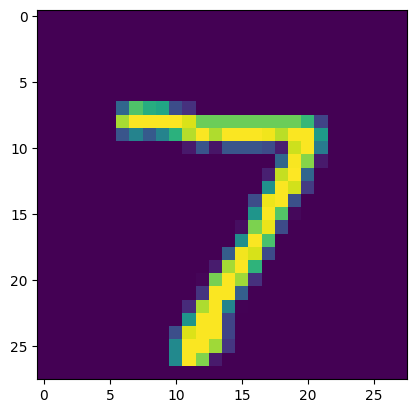

In [97]:
plt.imshow(X_test[0])

In [ ]:

model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 40ms/step


array([7])

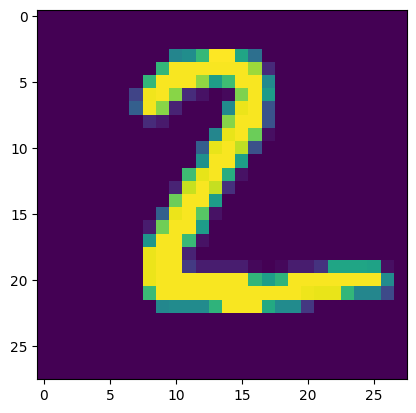

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)[0]

1/1 [==============================] - 0s 17ms/step


2

###Importing some random image and finding the results


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img1  = cv2.imread('/content/3.jpg')
img_gray =cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)
img_gray=img_gray/255

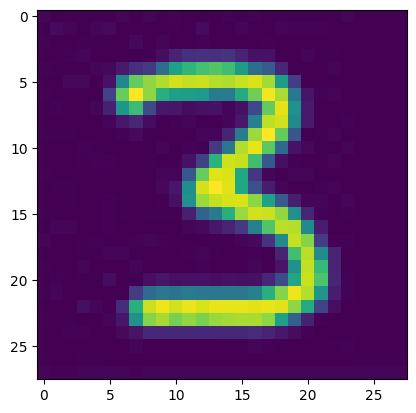

In [ ]:
plt.imshow(img_gray)

In [ ]:
model.predict(img_gray.reshape(1,28,28)).argmax(axis = 1)[0]

1/1 [==============================] - 0s 29ms/step


3

In [ ]:
img1  = cv2.imread('/content/2.png')
img_gray =cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)
img_gray=img_gray/255
model.predict(img_gray.reshape(1,28,28)).argmax(axis = 1)[0]

1/1 [==============================] - 0s 31ms/step


2

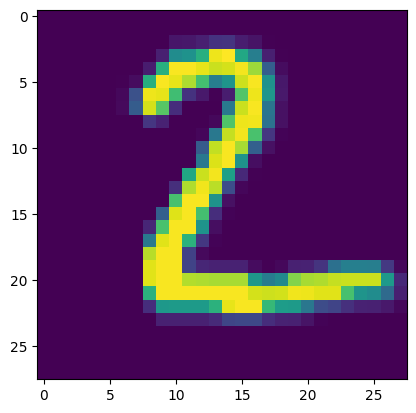

In [ ]:
plt.imshow(img_gray)